In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nfl-playing-surface-analytics/PlayList.csv
/kaggle/input/nfl-playing-surface-analytics/InjuryRecord.csv
/kaggle/input/nfl-playing-surface-analytics/PlayerTrackData.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
injury = pd.read_csv('/kaggle/input/nfl-playing-surface-analytics/InjuryRecord.csv')
playlist = pd.read_csv('/kaggle/input/nfl-playing-surface-analytics/PlayList.csv')
playtrack = pd.read_csv('/kaggle/input/nfl-playing-surface-analytics/PlayerTrackData.csv')

In [4]:
playtrack.head(5)

,PlayKey,time,event,x,y,dir,dis,o,s
0,26624-1-1,0.0,huddle_start_offense,87.46,28.93,288.24,0.01,262.33,0.13
1,26624-1-1,0.1,NaN,87.45,28.92,283.91,0.01,261.69,0.12
2,26624-1-1,0.2,NaN,87.44,28.92,280.40,0.01,261.17,0.12
3,26624-1-1,0.3,NaN,87.44,28.92,278.79,0.01,260.66,0.10
4,26624-1-1,0.4,NaN,87.44,28.92,275.44,0.01,260.27,0.09


In [5]:
injury.head(5)

,PlayerKey,GameID,PlayKey,BodyPart,Surface,DM_M1,DM_M7,DM_M28,DM_M42
0,39873,39873-4,39873-4-32,Knee,Synthetic,1,1,1,1
1,46074,46074-7,46074-7-26,Knee,Natural,1,1,0,0
2,36557,36557-1,36557-1-70,Ankle,Synthetic,1,1,1,1
3,46646,46646-3,46646-3-30,Ankle,Natural,1,0,0,0
4,43532,43532-5,43532-5-69,Ankle,Synthetic,1,1,1,1


In [6]:
playlist.head(5)

,PlayerKey,GameID,PlayKey,RosterPosition,PlayerDay,PlayerGame,StadiumType,FieldType,Temperature,Weather,PlayType,PlayerGamePlay,Position,PositionGroup
0,26624,26624-1,26624-1-1,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,1,QB,QB
1,26624,26624-1,26624-1-2,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,2,QB,QB
2,26624,26624-1,26624-1-3,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,3,QB,QB
3,26624,26624-1,26624-1-4,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Rush,4,QB,QB
4,26624,26624-1,26624-1-5,Quarterback,1,1,Outdoor,Synthetic,63,Clear and warm,Pass,5,QB,QB


In [7]:
injury_playkey = pd.DataFrame(injury.PlayKey.value_counts()).index
playlist_injury = pd.DataFrame()
for i in injury_playkey:
    new_table = playlist[playlist.PlayKey == i]
    playlist_injury = pd.concat([playlist_injury, new_table])

In [8]:
col = ['DM_M1', 'DM_M7', 'DM_M28', 'DM_M42']
test = pd.DataFrame()
for c in col: test[c] = injury[c]

In [9]:
bodypart = pd.DataFrame(injury.BodyPart.value_counts())
surface = pd.DataFrame(injury.Surface.value_counts())
period = []

for i in range(len(injury)):
    x = test.loc[i].sum()
    for j in range(4):
        if x == (j+1): period.append(col[j])

period = pd.DataFrame(pd.DataFrame(period, columns=['period']).period.value_counts())
period = period.reindex(col)

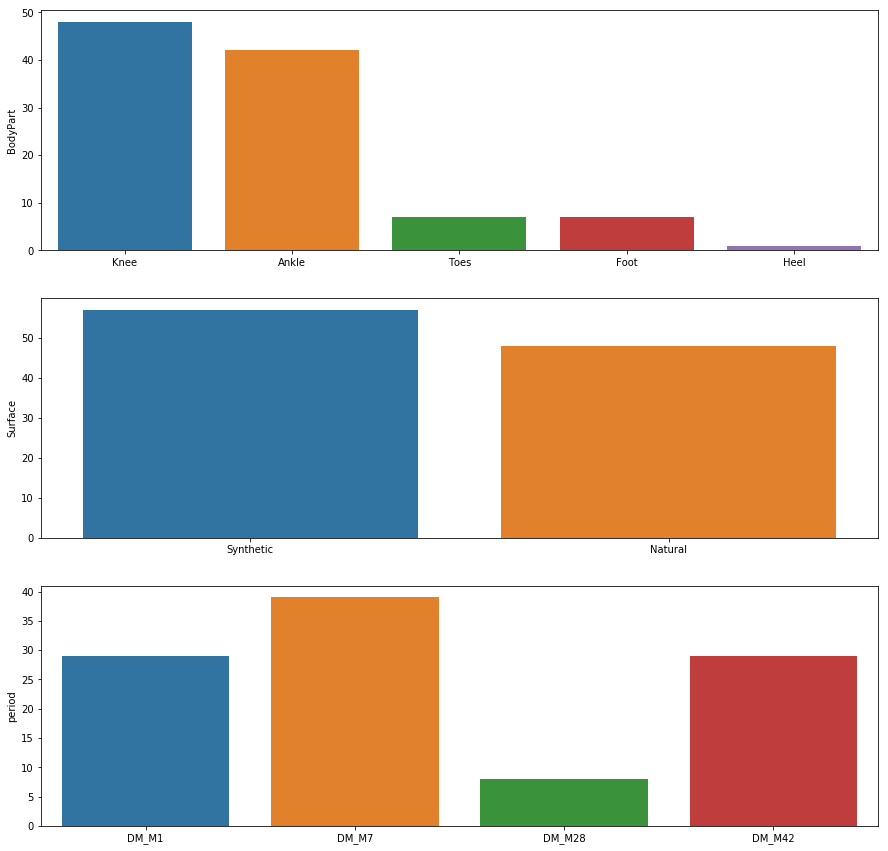

In [10]:
f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

sns.barplot(x=bodypart.index, y=bodypart.BodyPart, ax=ax1)
sns.barplot(x=surface.index, y=surface.Surface, ax=ax2)
sns.barplot(x=period.index, y=period.period, ax=ax3)

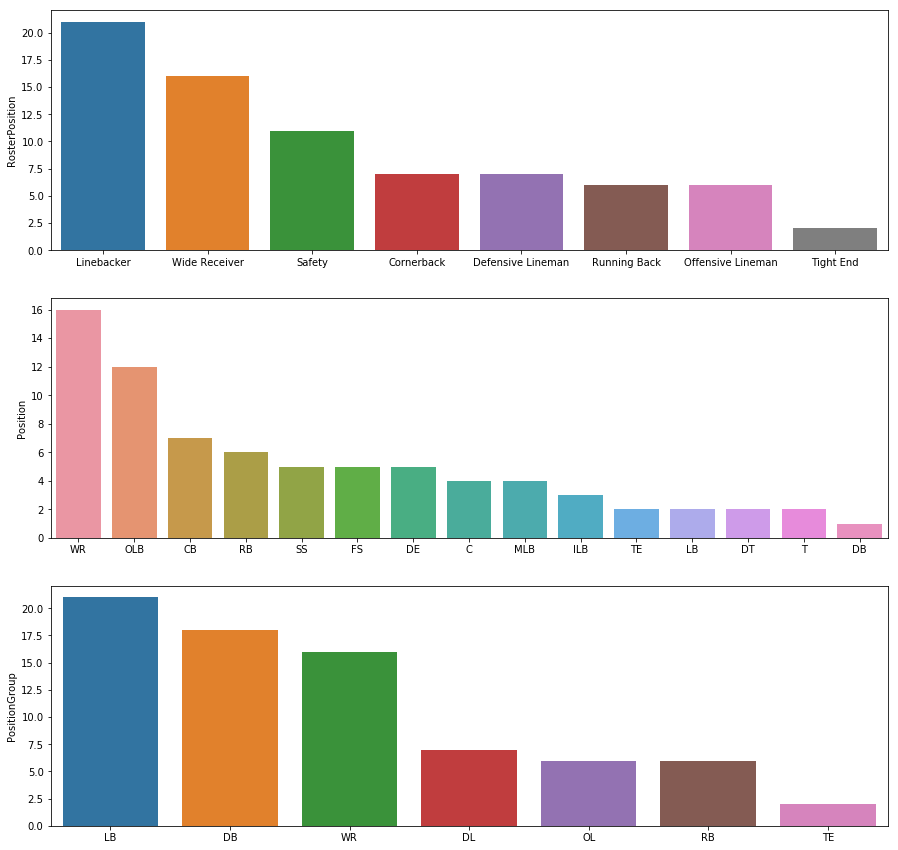

In [11]:
roster = pd.DataFrame(playlist.RosterPosition.value_counts())
position = pd.DataFrame(playlist.Position.value_counts())
positiongroup = pd.DataFrame(playlist.PositionGroup.value_counts())

injury_roster = pd.DataFrame(playlist_injury.RosterPosition.value_counts())
injury_position = pd.DataFrame(playlist_injury.Position.value_counts())
injury_group = pd.DataFrame(playlist_injury.PositionGroup.value_counts())

import seaborn as sns
import matplotlib.pyplot as plt

f, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

sns.barplot(x=injury_roster.index, y=injury_roster.RosterPosition, data=injury_roster, ax=ax1)
sns.barplot(x=injury_position.index, y=injury_position.Position, data=injury_position, ax=ax2)
sns.barplot(x=injury_group.index, y=injury_group.PositionGroup, data=injury_group, ax=ax3)

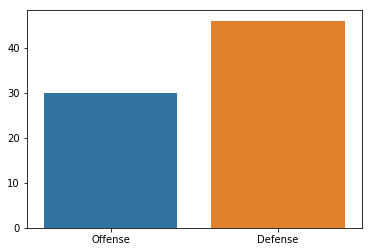

In [12]:
offdef = {}

offdef['offense'] = ['Wide Receiver', 'Running Back', 'Offensive Lineman', 'Tight End']
offdef['defense'] = ['Linebacker', 'Safety', 'Defensive Lineman', 'Cornerback']

off_def = [] 

for o in ['offense', 'defense']:
    no = []
    for j in range(4):
        no.append(injury_roster.RosterPosition.loc[offdef[o][j]])
    no = np.array(no).sum()
    off_def.append(no)

sns.barplot(x=['Offense', 'Defense'], y=off_def)

In [13]:
injury_playtrack = pd.DataFrame()
for i in injury_playkey:
    injury_playtrack = pd.concat([injury_playtrack, playtrack[playtrack.PlayKey == i]])

no = np.linspace(0, 76, 8)
for i, n in enumerate(no): no[i] = int(round(n))

speed = {}

for i in range(7):
    speed[str(i)] = pd.DataFrame()
    for j in np.arange(no[i], no[i+1]):
        j = int(j)
        table = injury_playtrack[injury_playtrack.PlayKey == injury_playkey[j]].tail(40)
        table['time'] = np.arange(0, 4, 0.1)
        speed[str(i)] = pd.concat([speed[str(i)], table])    

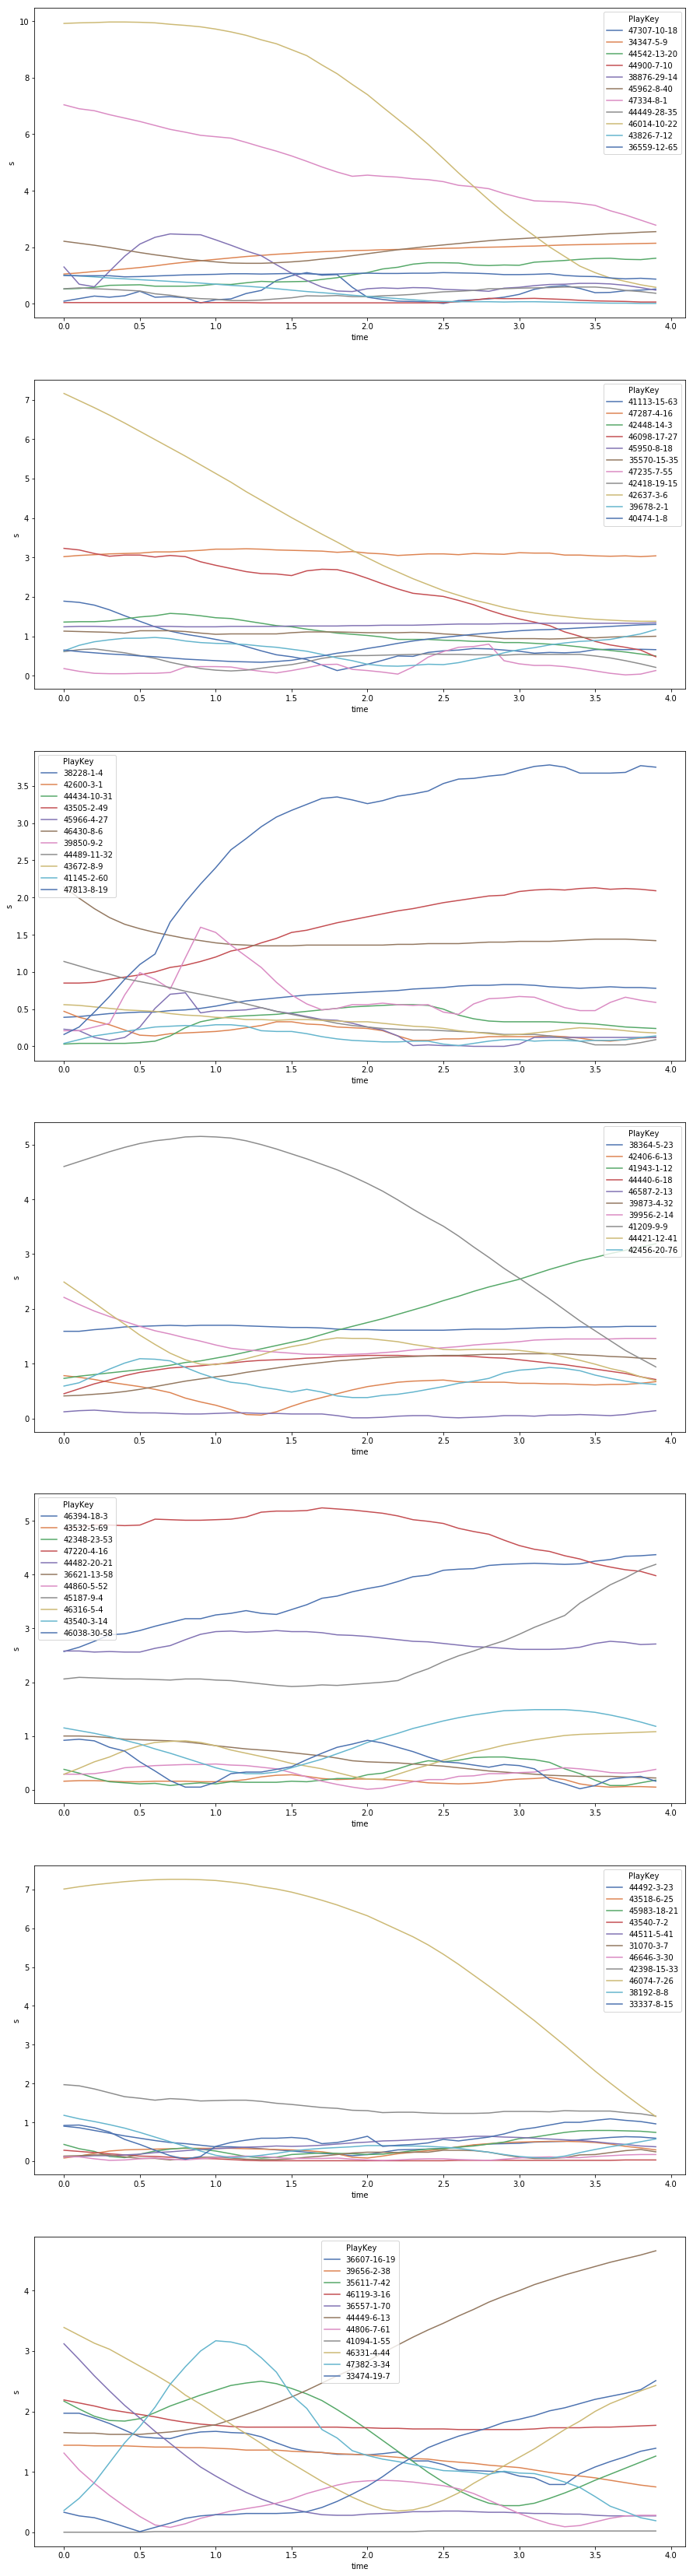

In [14]:
time = np.arange(0, 40)
gap = [(no[i+1] - no[i]) for i in range(7)]
f, (ax0, ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(7, 1, figsize=(15, 60))
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6]

for i in range(7):
    df = speed[str(i)]
    sns.lineplot(x='time', y='s', hue='PlayKey', palette='deep', data=df, ax=axes[i])

In [15]:
width = np.arange(0, 130, 10)
num = ['G', '10', '20', '30', '40', '50', '40', '30', '20', '10', 'G']

new_width = list(width)
new_width.remove(new_width[0])
new_width.remove(new_width[11])

def plot_position(k):
    plt.figure(figsize=(13, 5.5))
    used = injury_playtrack[injury_playtrack.PlayKey == k]

    for w in width:
        plt.plot([w, w], [0, 53.3], color='black')
    plt.plot([0, 120], [53.3, 53.3], color='black')
    plt.plot([0, 120], [0, 0], color='black')
    for n, w in zip(num, new_width):
        plt.text(w-2, 3, n, fontsize=20)
        plt.text(w-2, 50, n, fontsize=20, rotation=180)
    plt.text(2, 40, 'HOME ENDZONE', rotation=90, fontsize=20)
    plt.text(115, 40, 'AWAY ENDZONE', rotation=270, fontsize=20)
    sns.scatterplot(x='x', y='y', data=used, hue='time', s=200)
    plt.show()

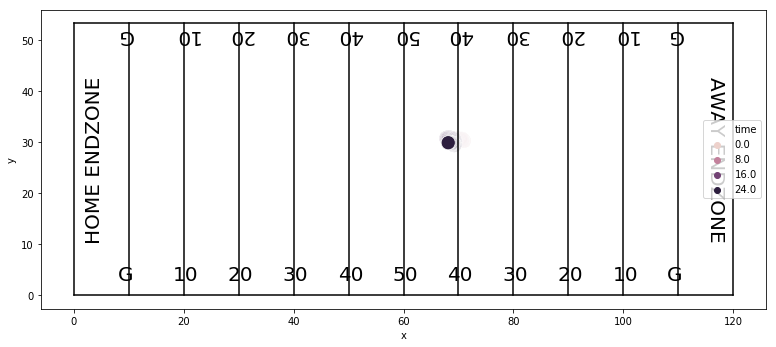

In [16]:
plot_position(injury_playkey[20])

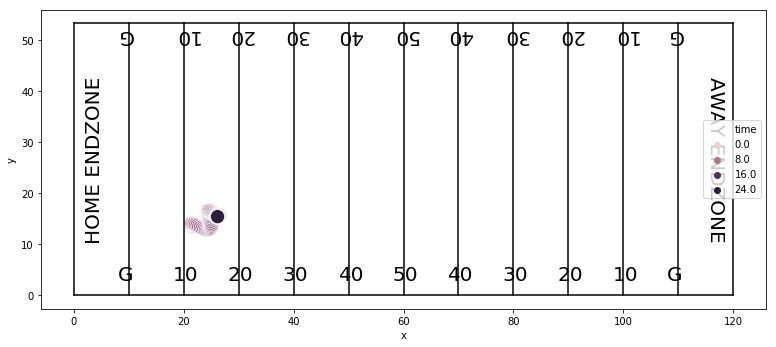

In [17]:
plot_position(injury_playkey[31])

In [18]:
injury_true = []
for x in list(playlist.PlayKey): injury_true.append(int(x in injury_playkey))

def get_heatmap(param):
    oh = OneHotEncoder()
    enc = LabelEncoder()
    first = enc.fit_transform(list(playlist[param]))
    secnd = oh.fit_transform(first.reshape([-1, 1]))
    df = pd.DataFrame(secnd.toarray())
    df.columns = enc.classes_
    df['injury'] = injury_true
    corr = df.corr()
    plt.figure(figsize=(20, 20))
    sns.heatmap(corr, linewidths=0.3)
    corr = corr.drop('injury')
    plt.figure(figsize=(20, 20))
    chart = sns.barplot(x=corr.index, y=corr.injury)    
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


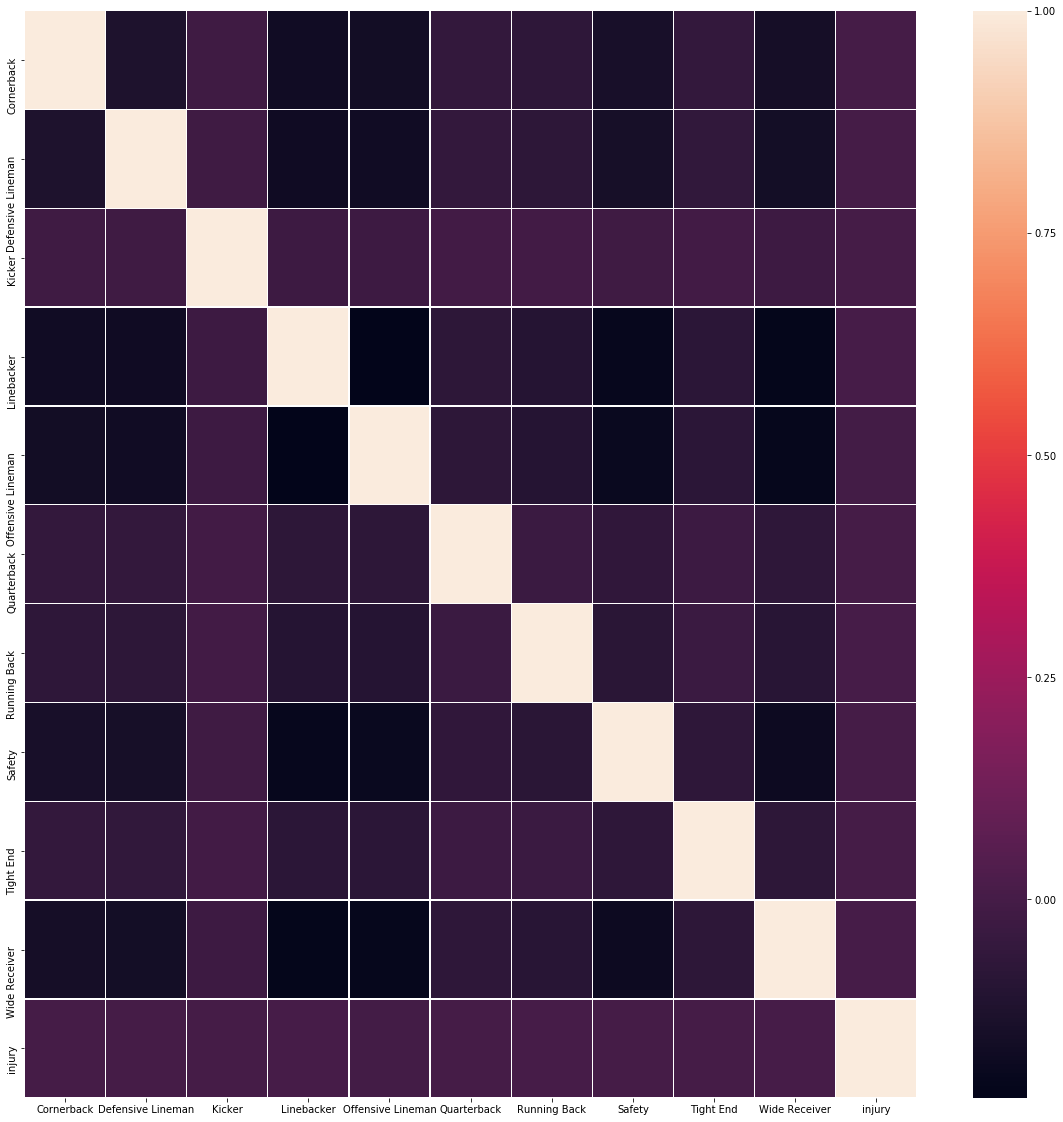

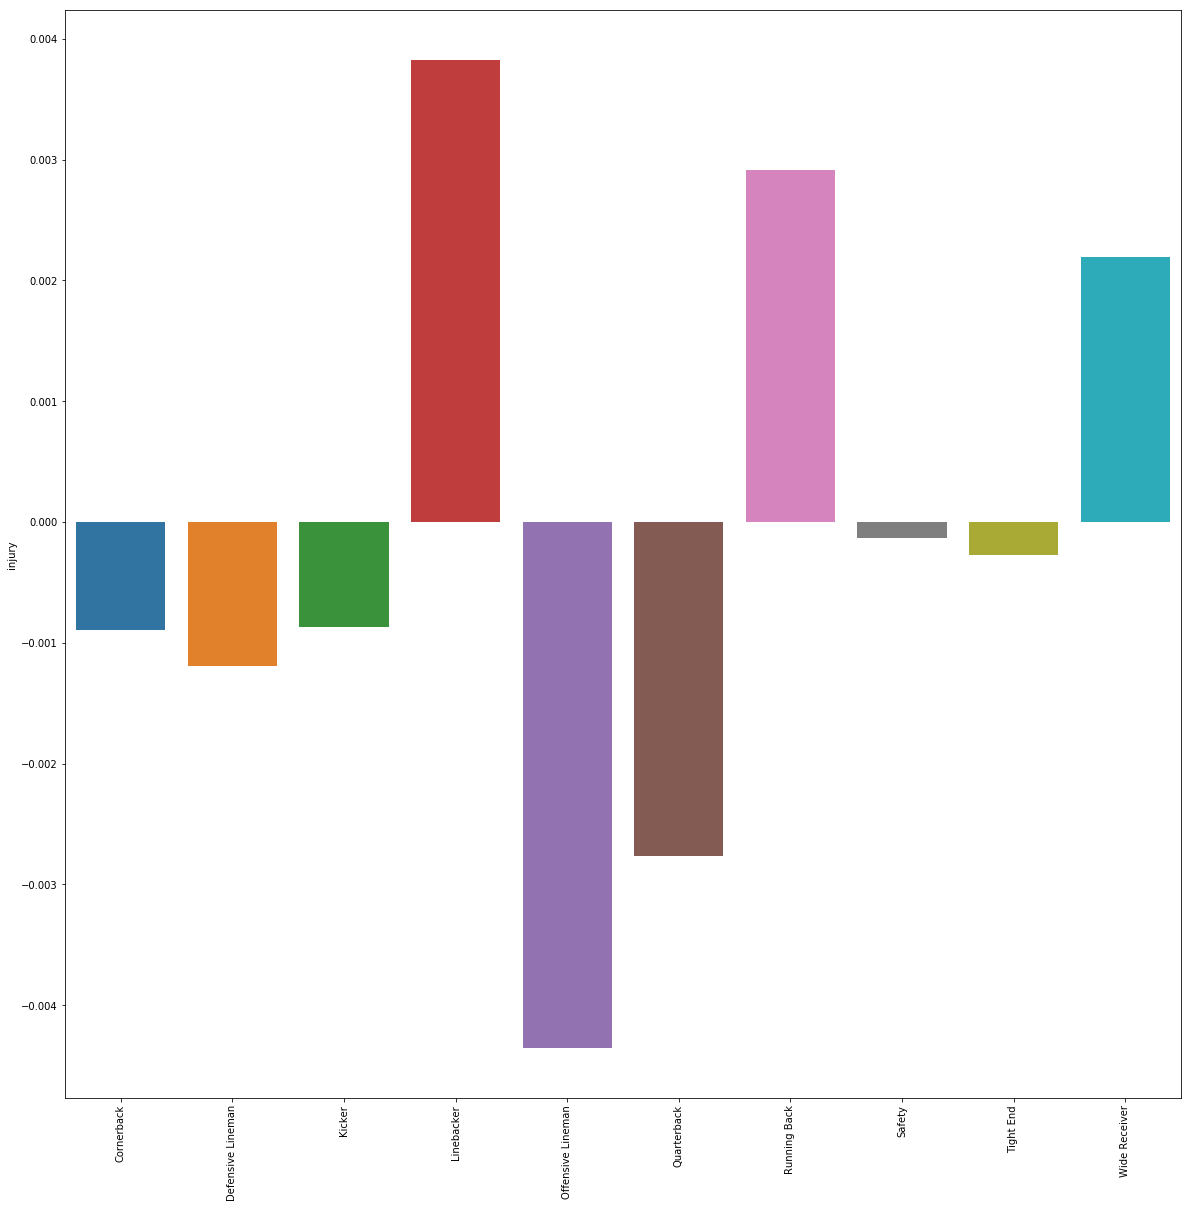

In [19]:
get_heatmap('RosterPosition')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


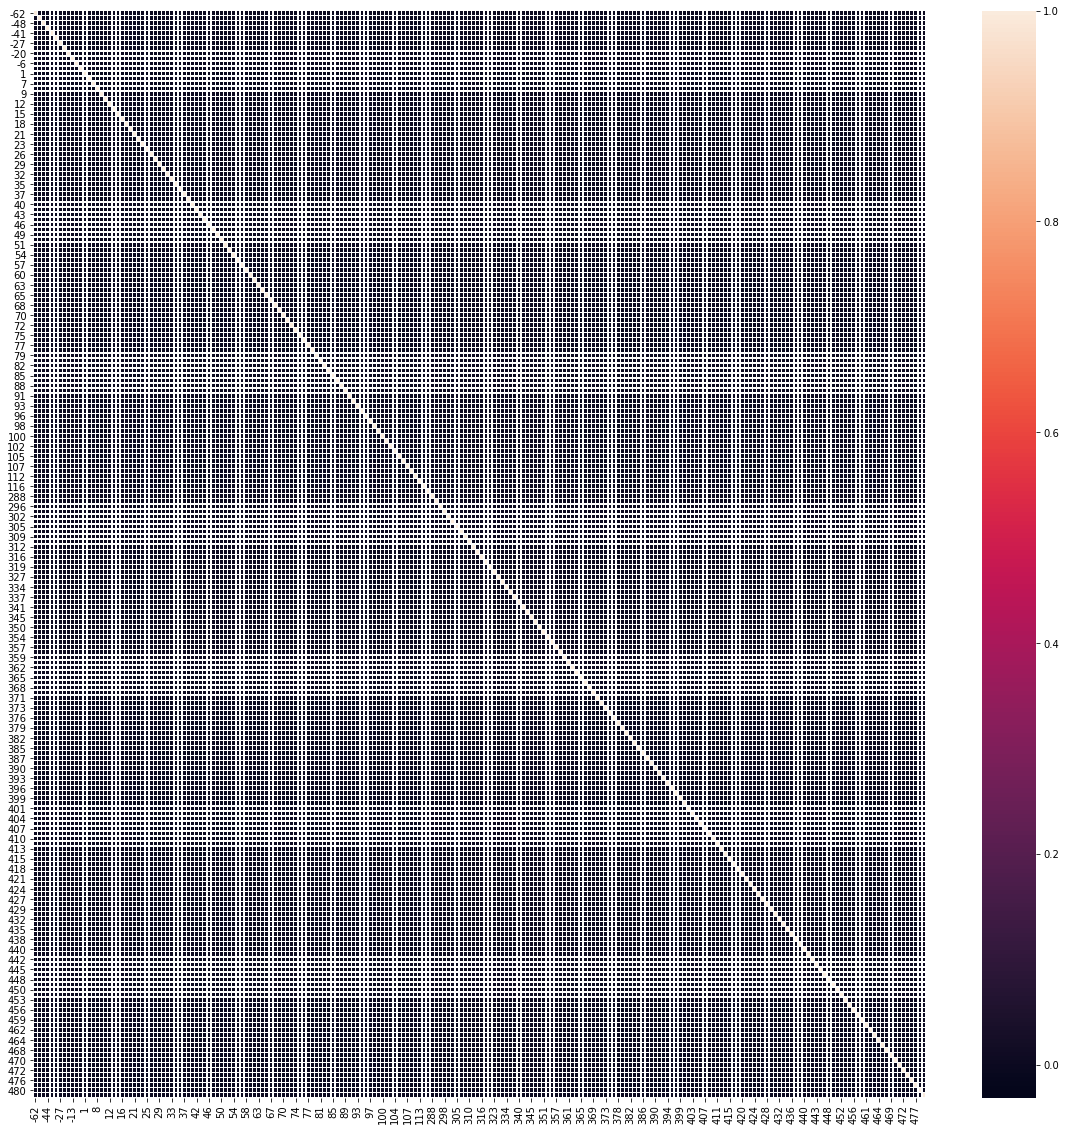

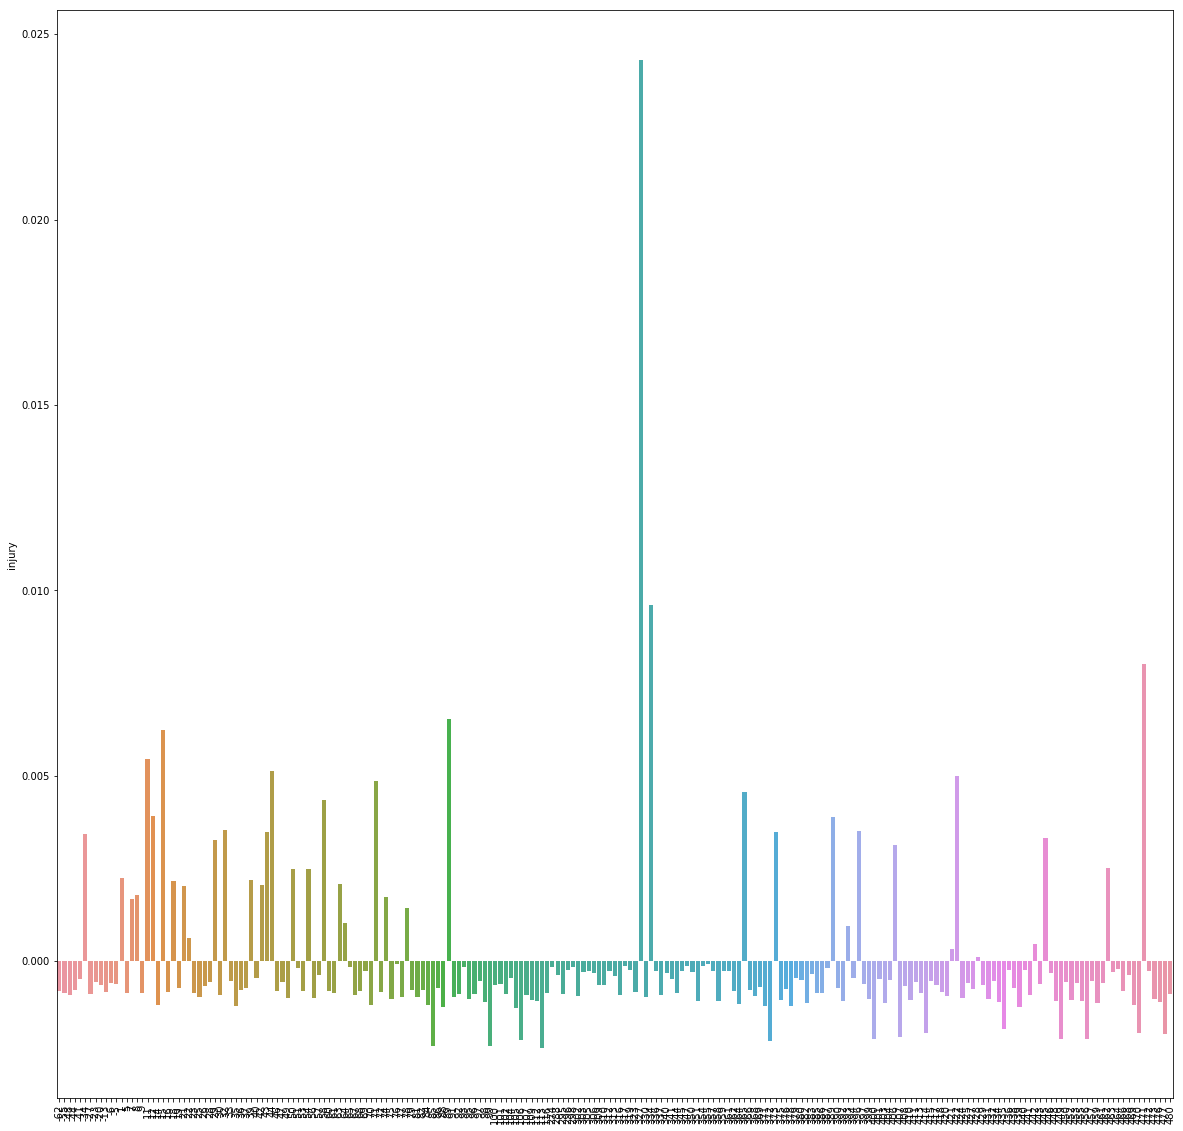

In [20]:
get_heatmap('PlayerDay')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


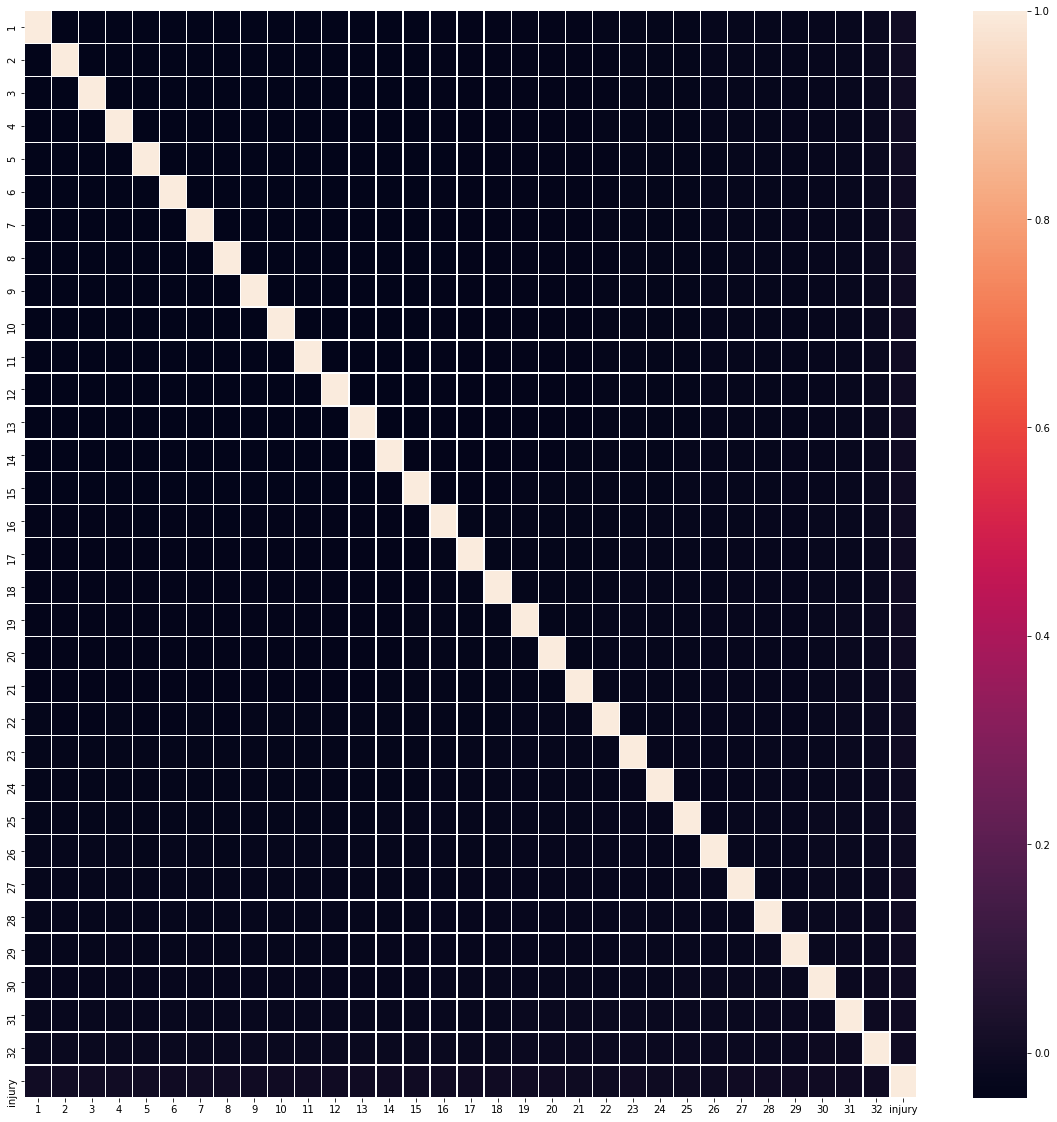

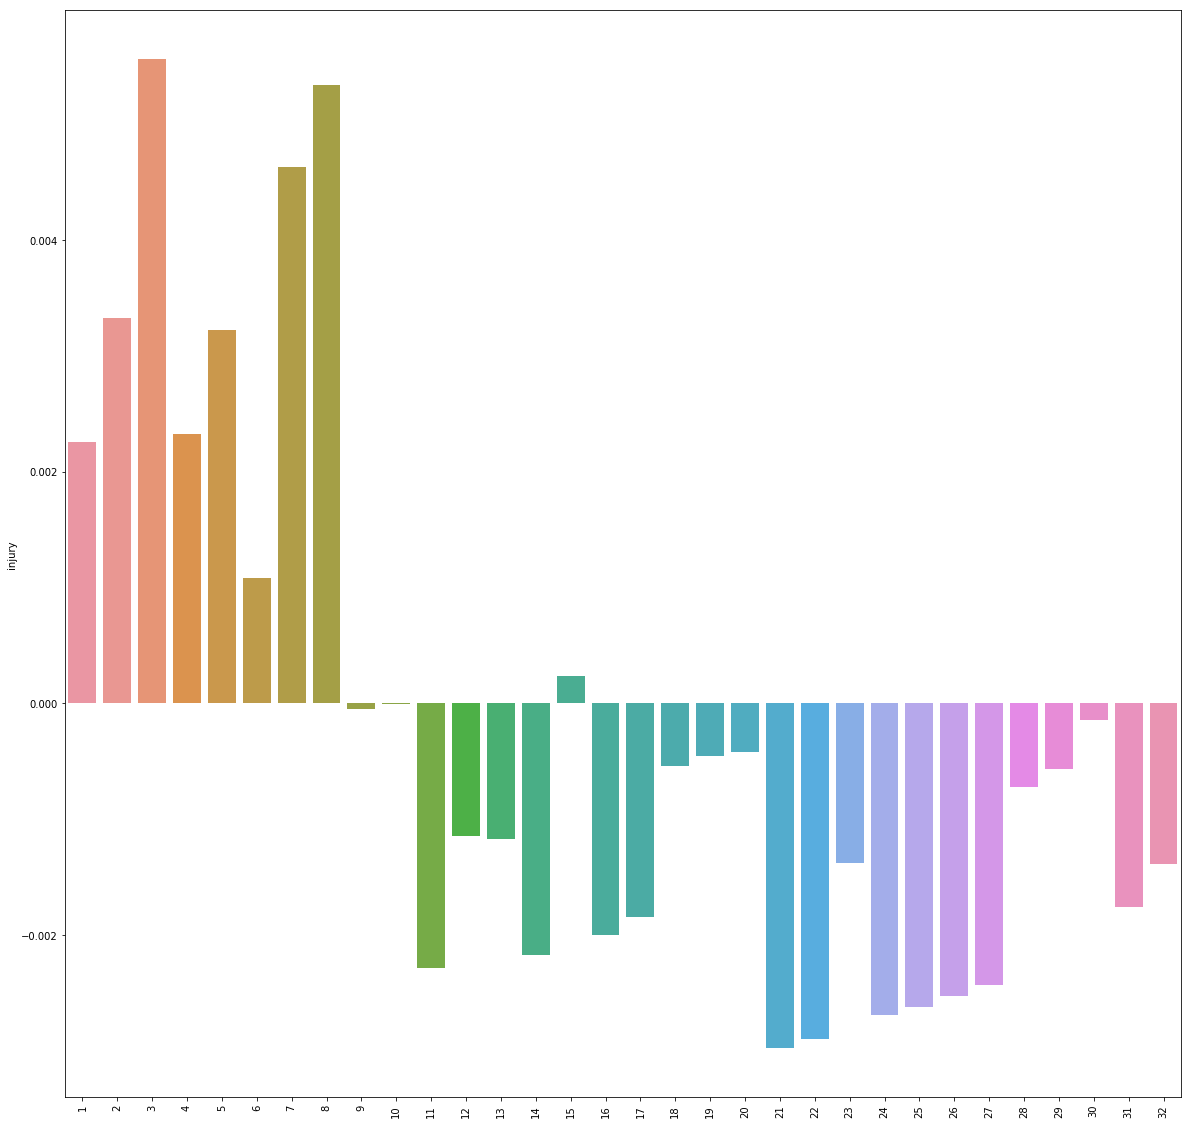

In [21]:
get_heatmap('PlayerGame')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


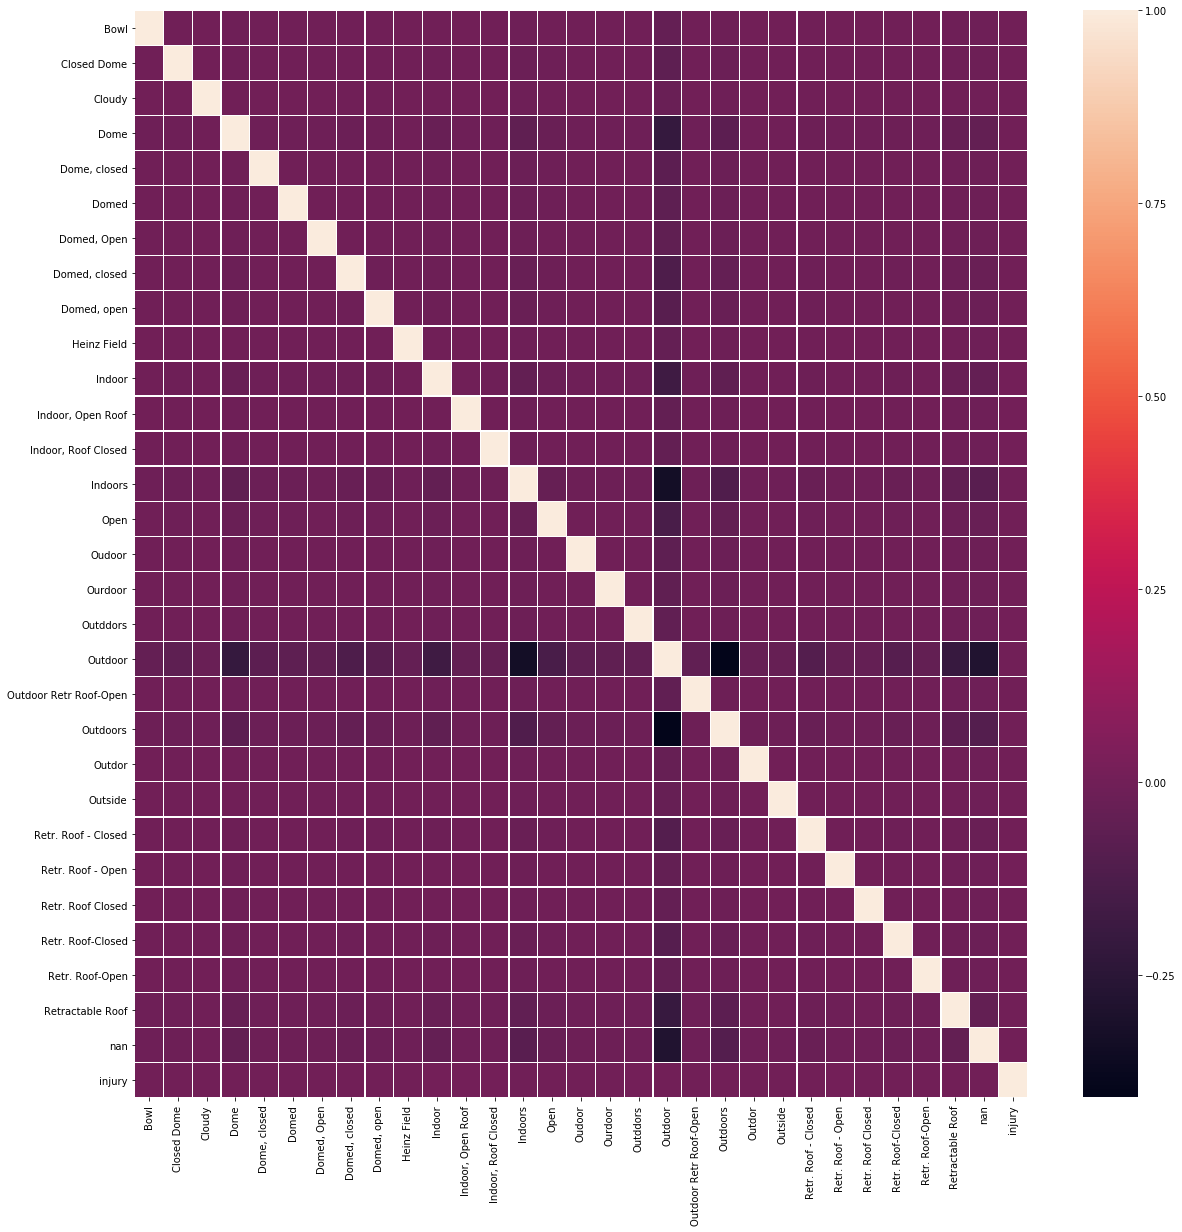

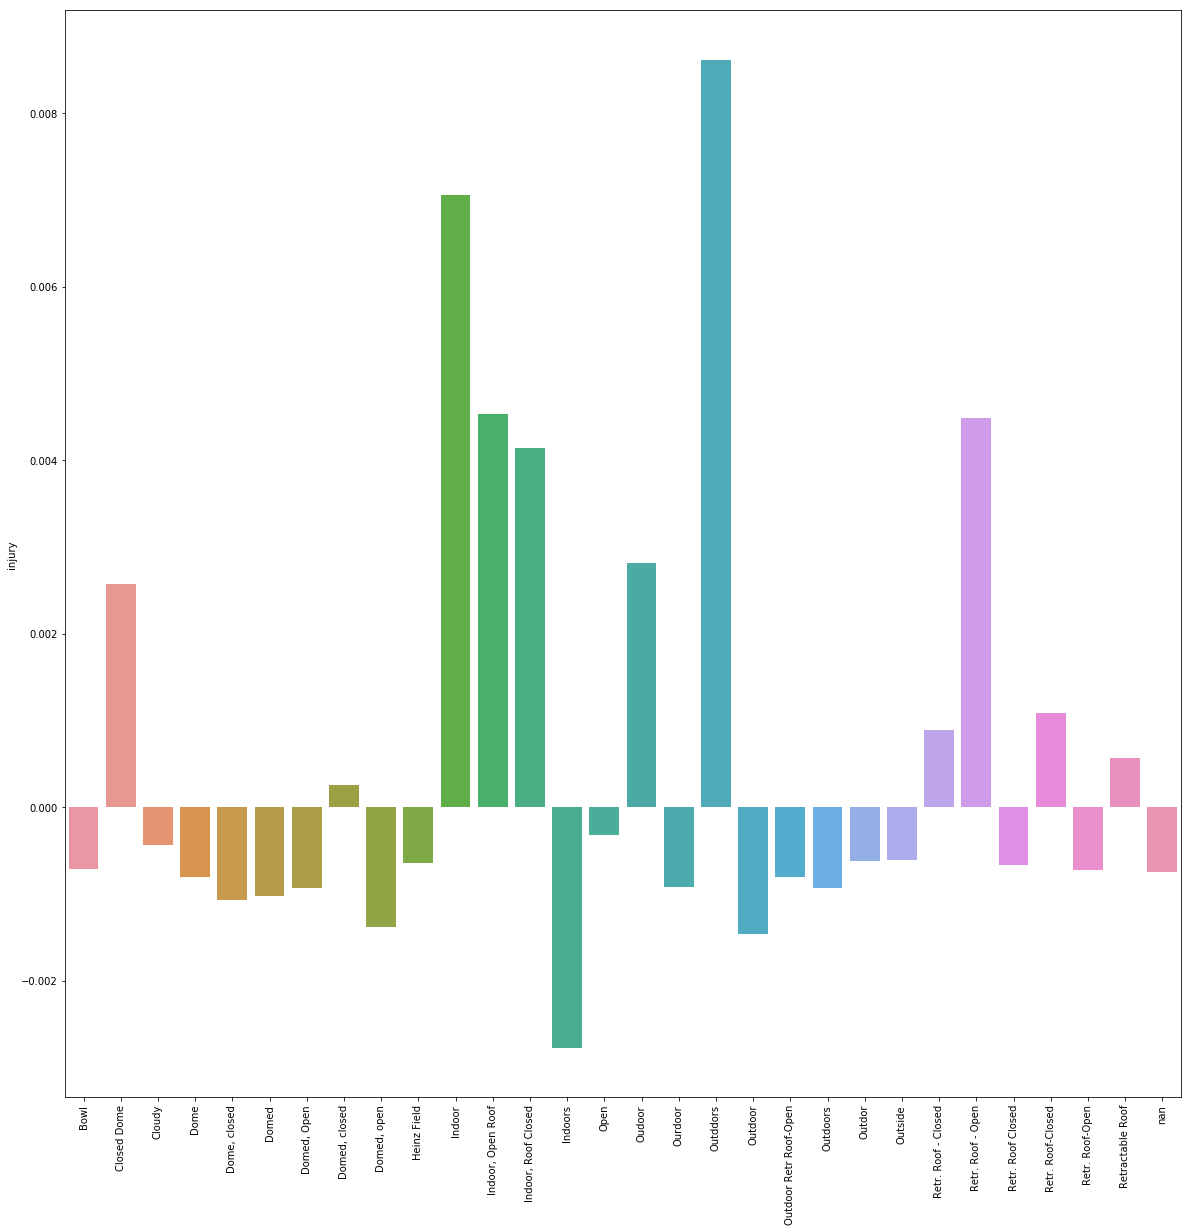

In [22]:
get_heatmap('StadiumType')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


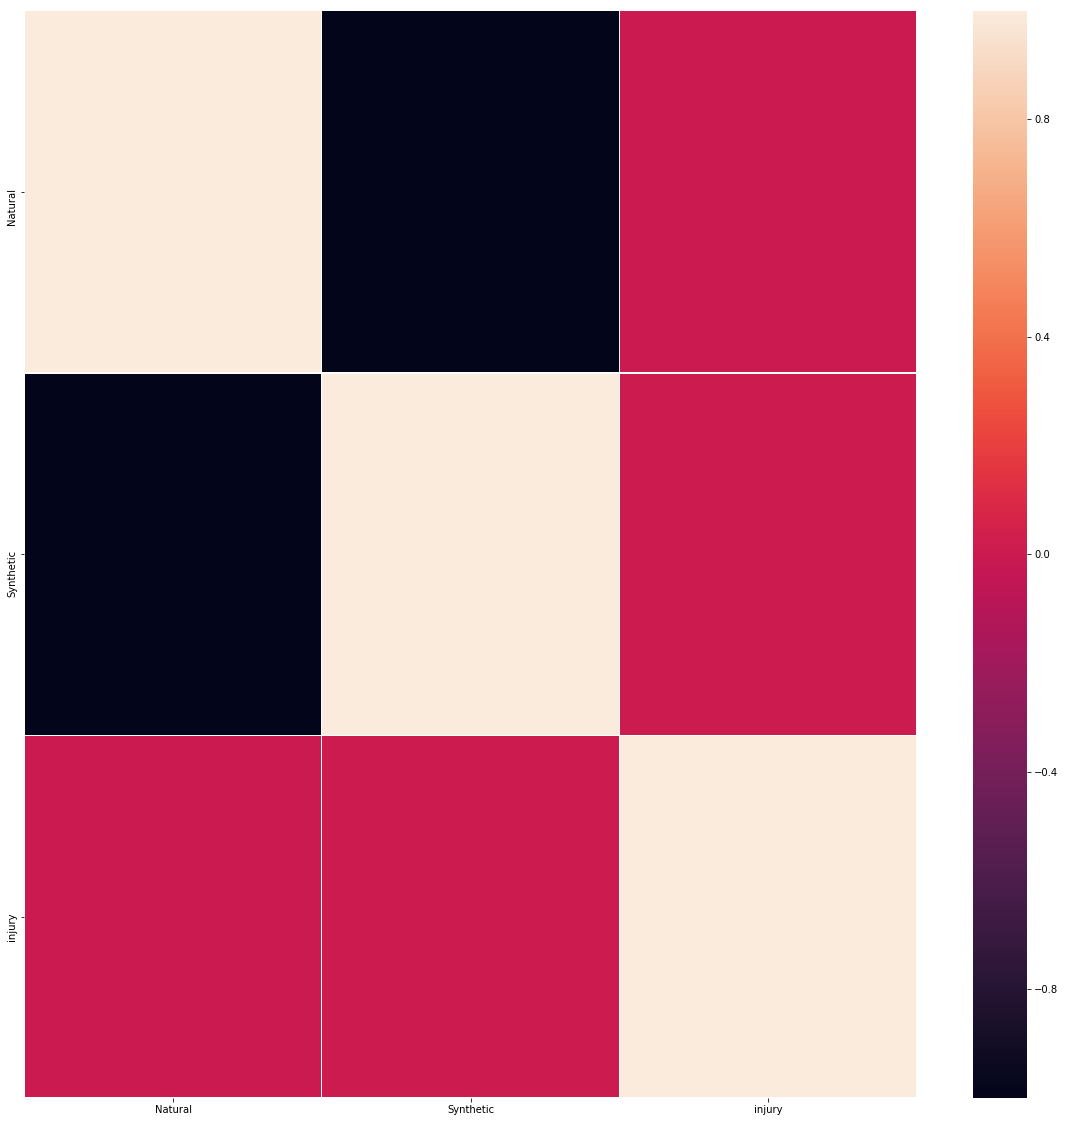

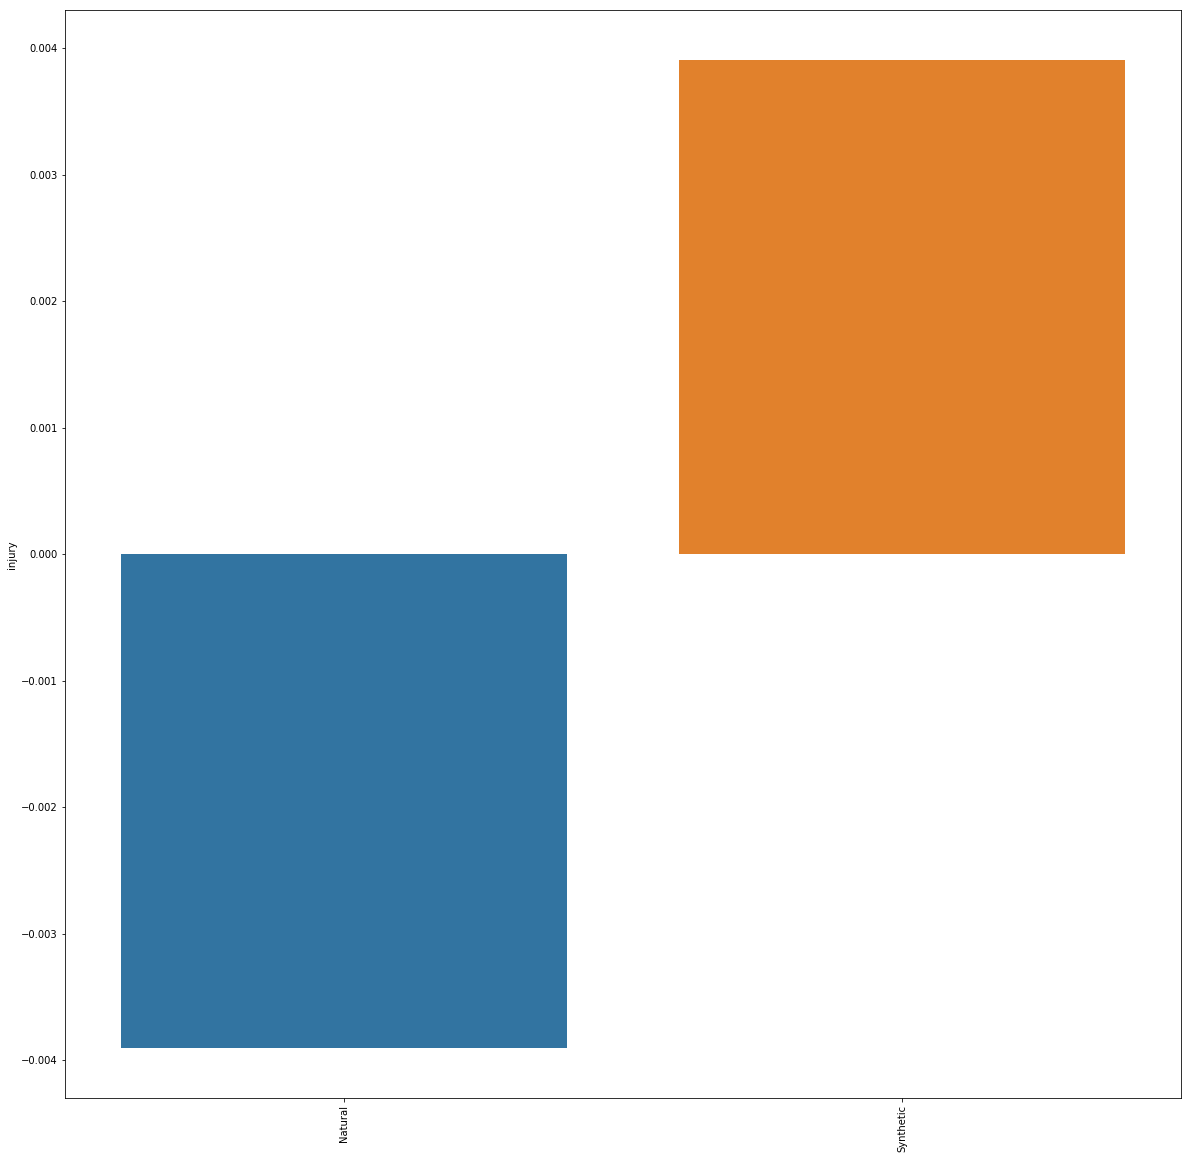

In [23]:
get_heatmap('FieldType')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


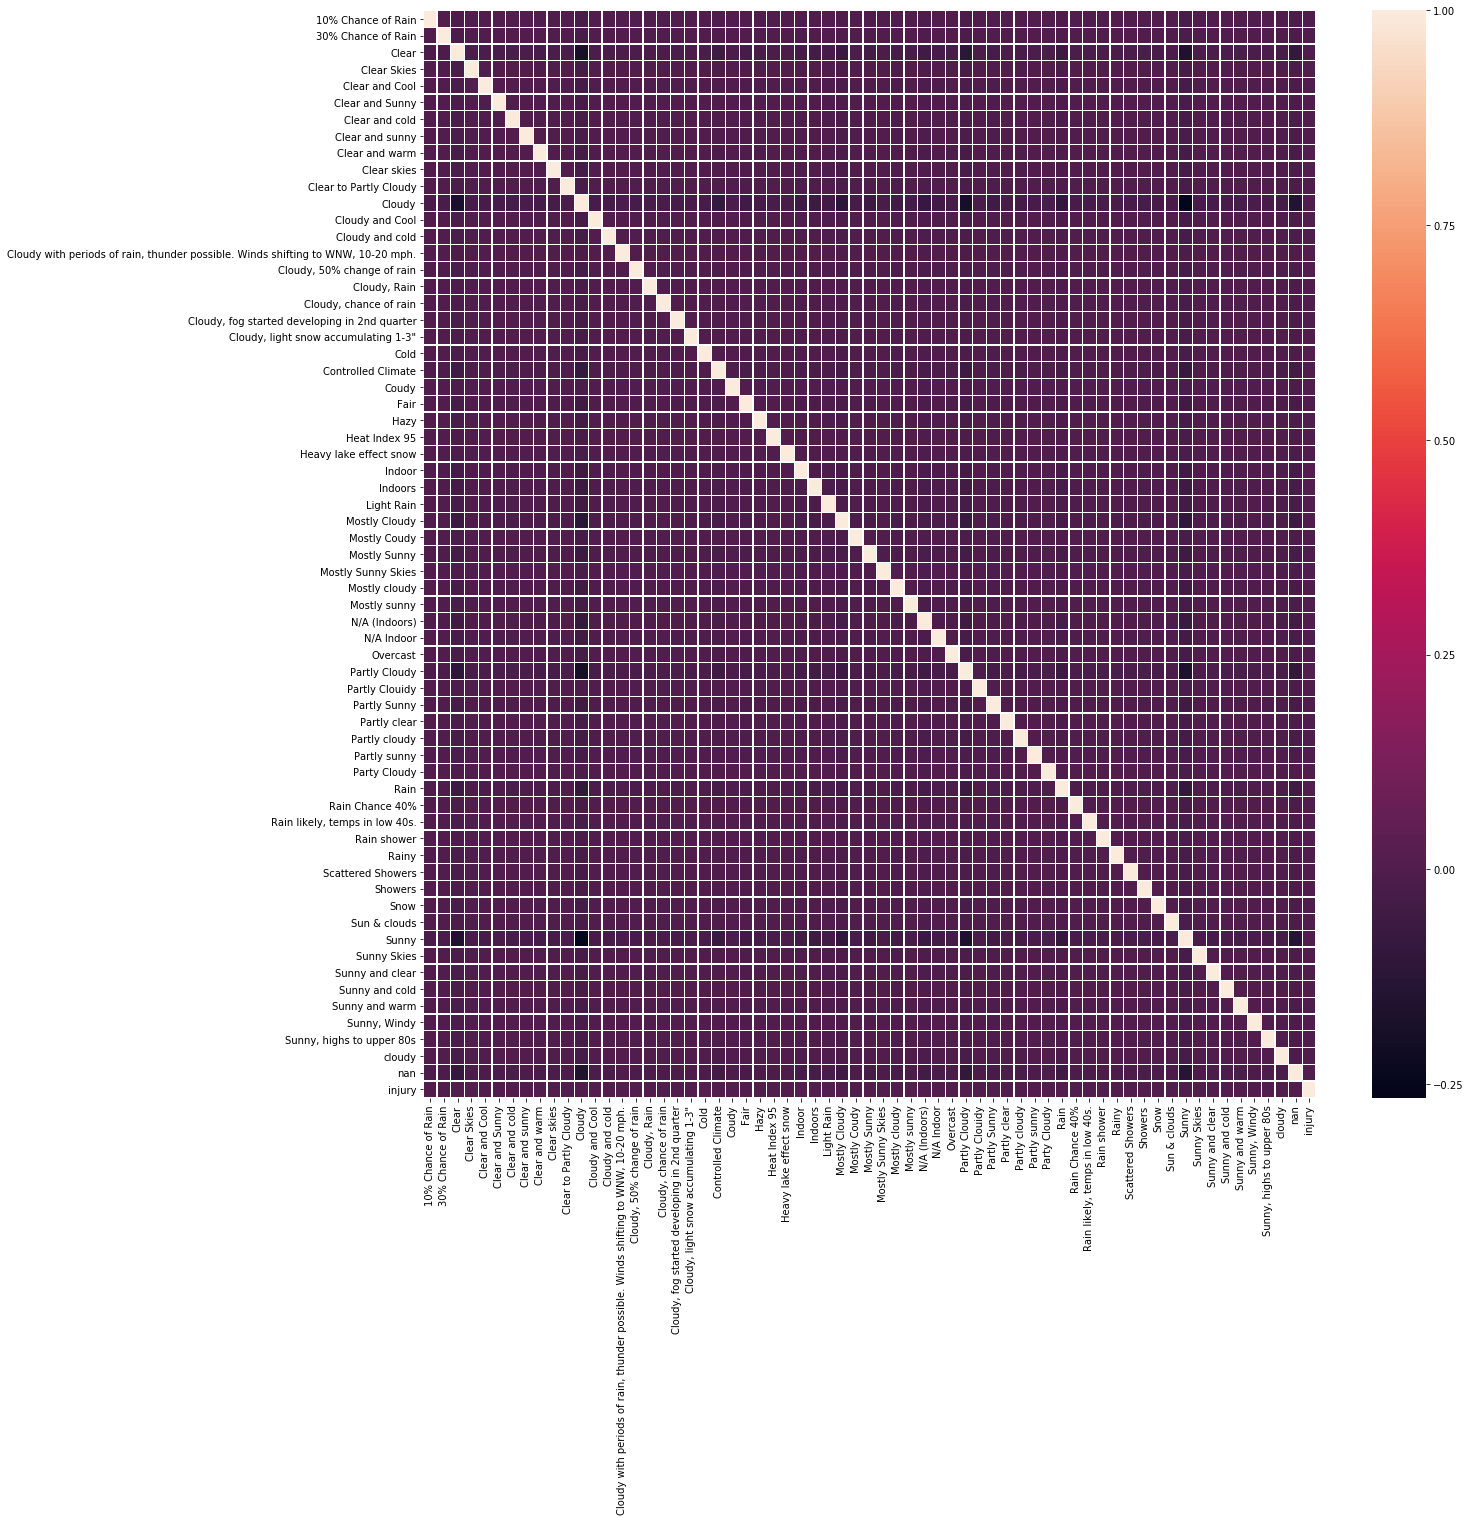

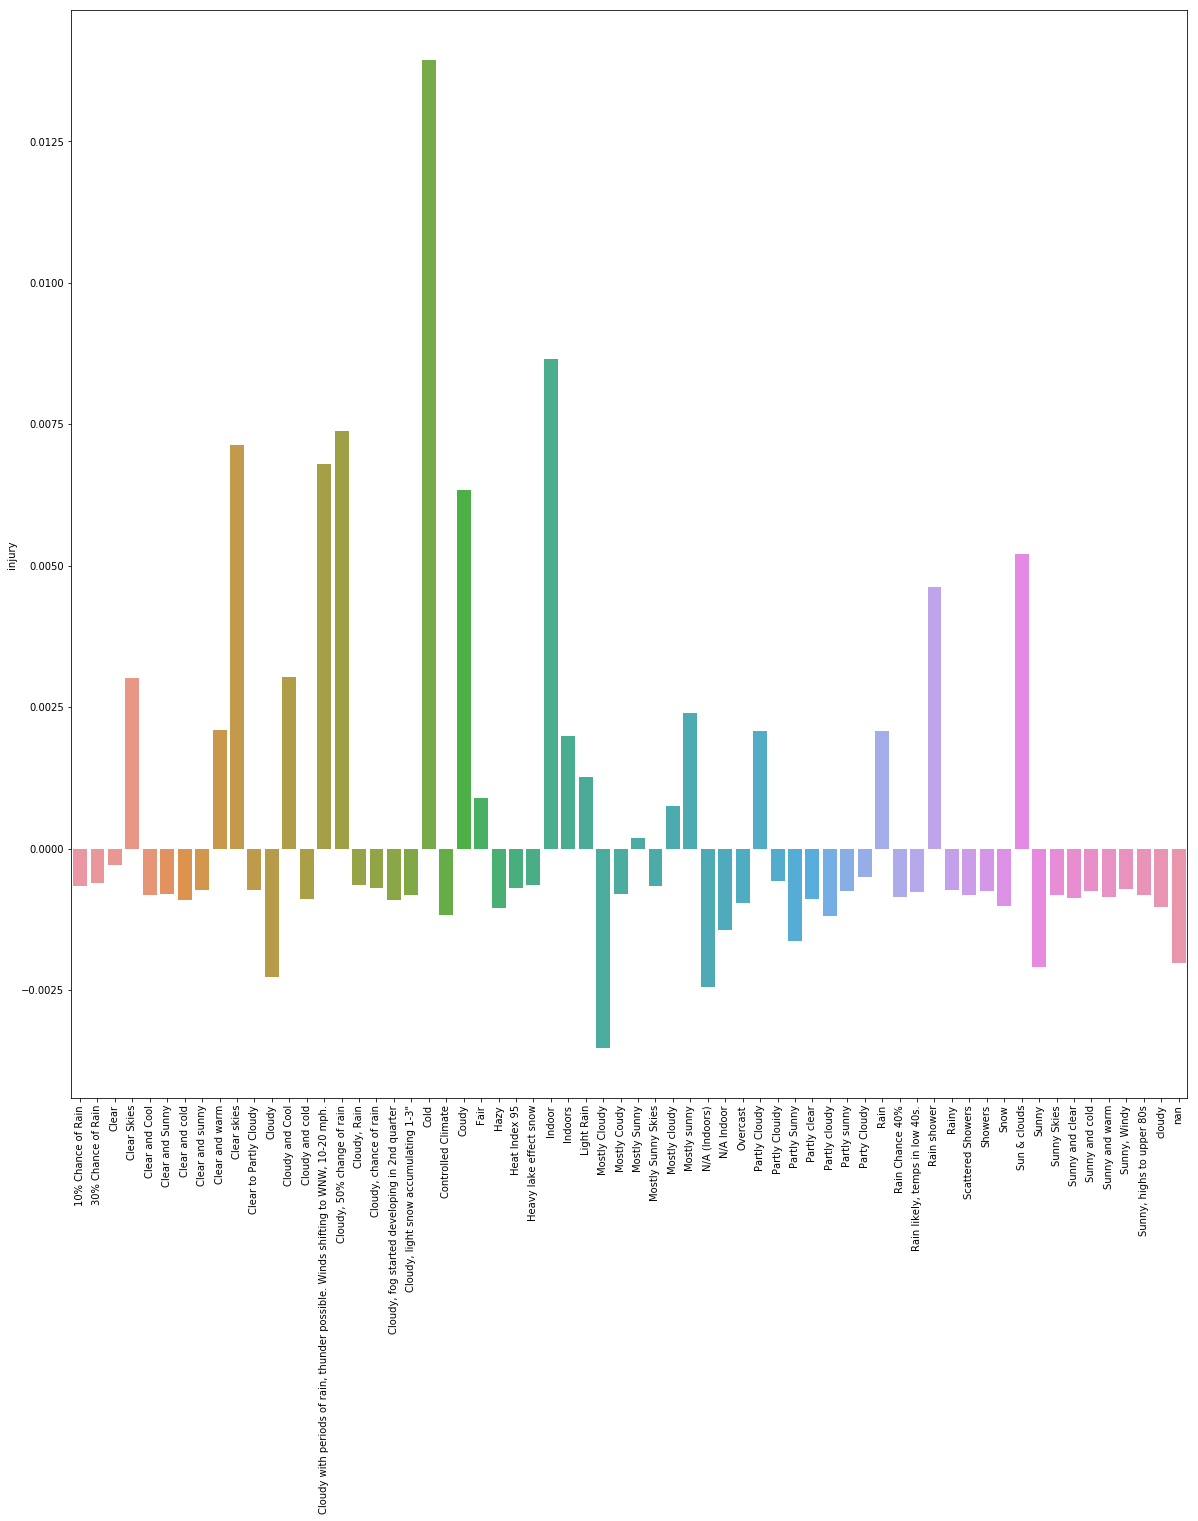

In [24]:
get_heatmap('Weather')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


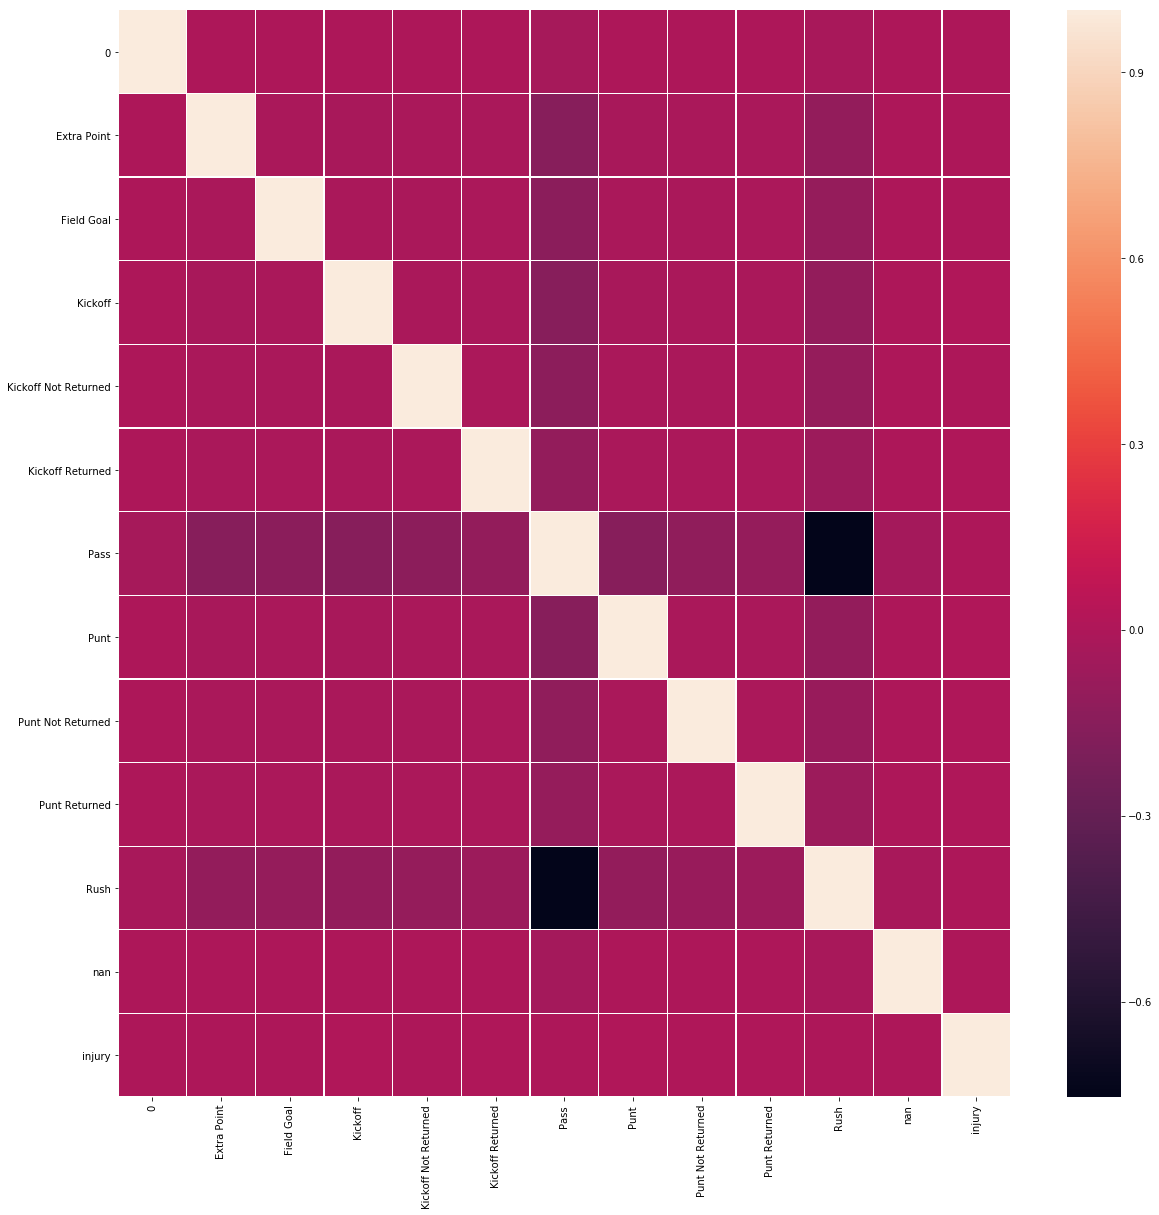

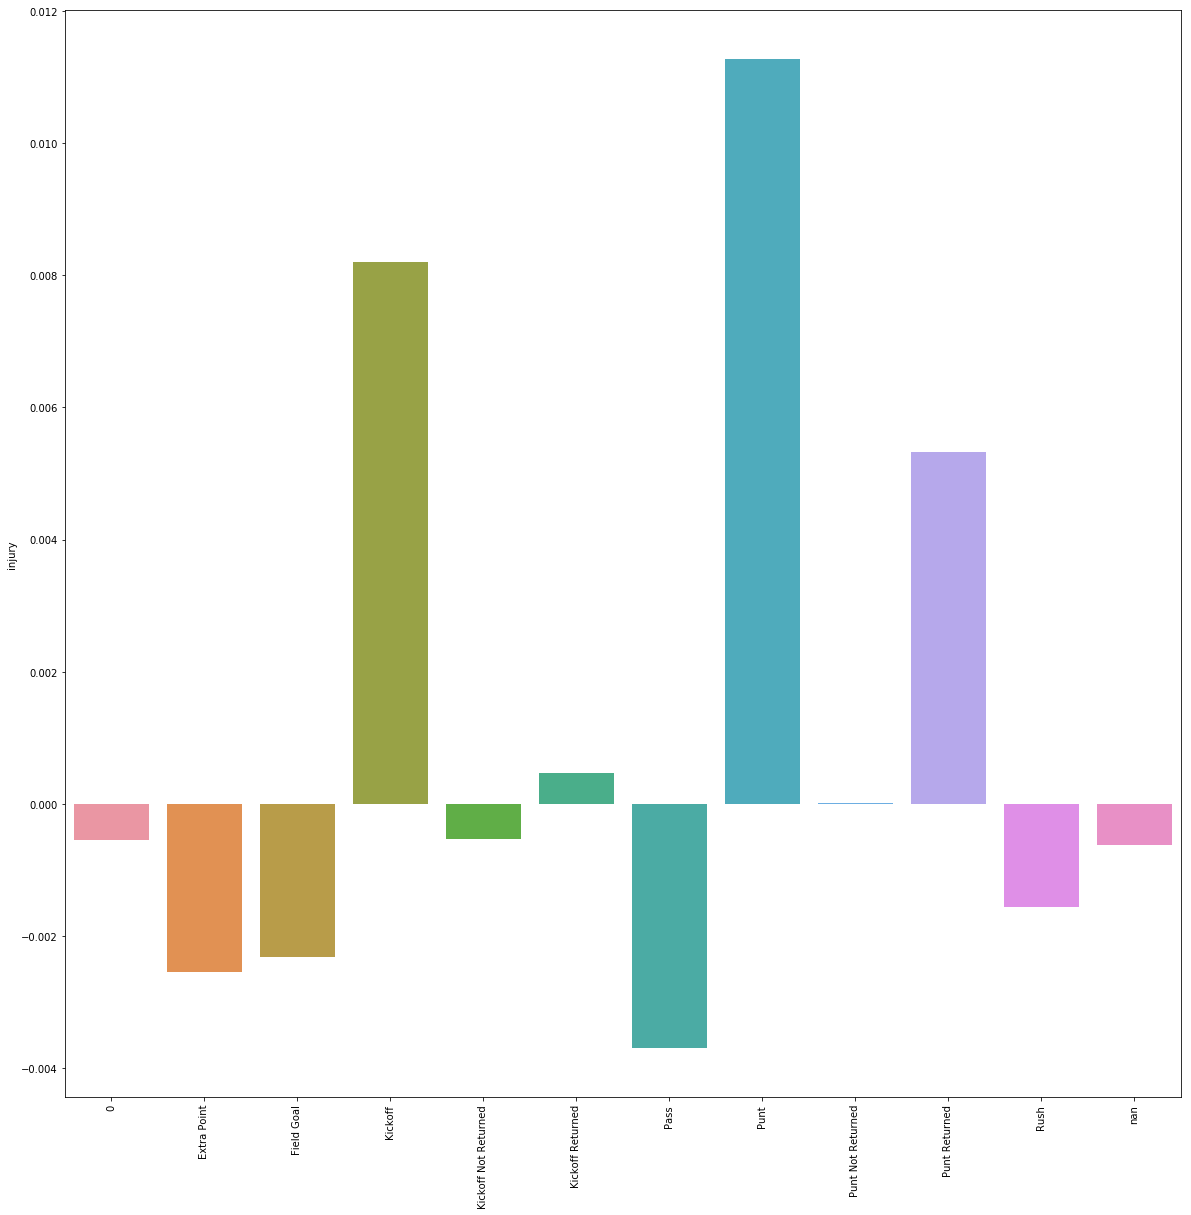

In [25]:
get_heatmap('PlayType')

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


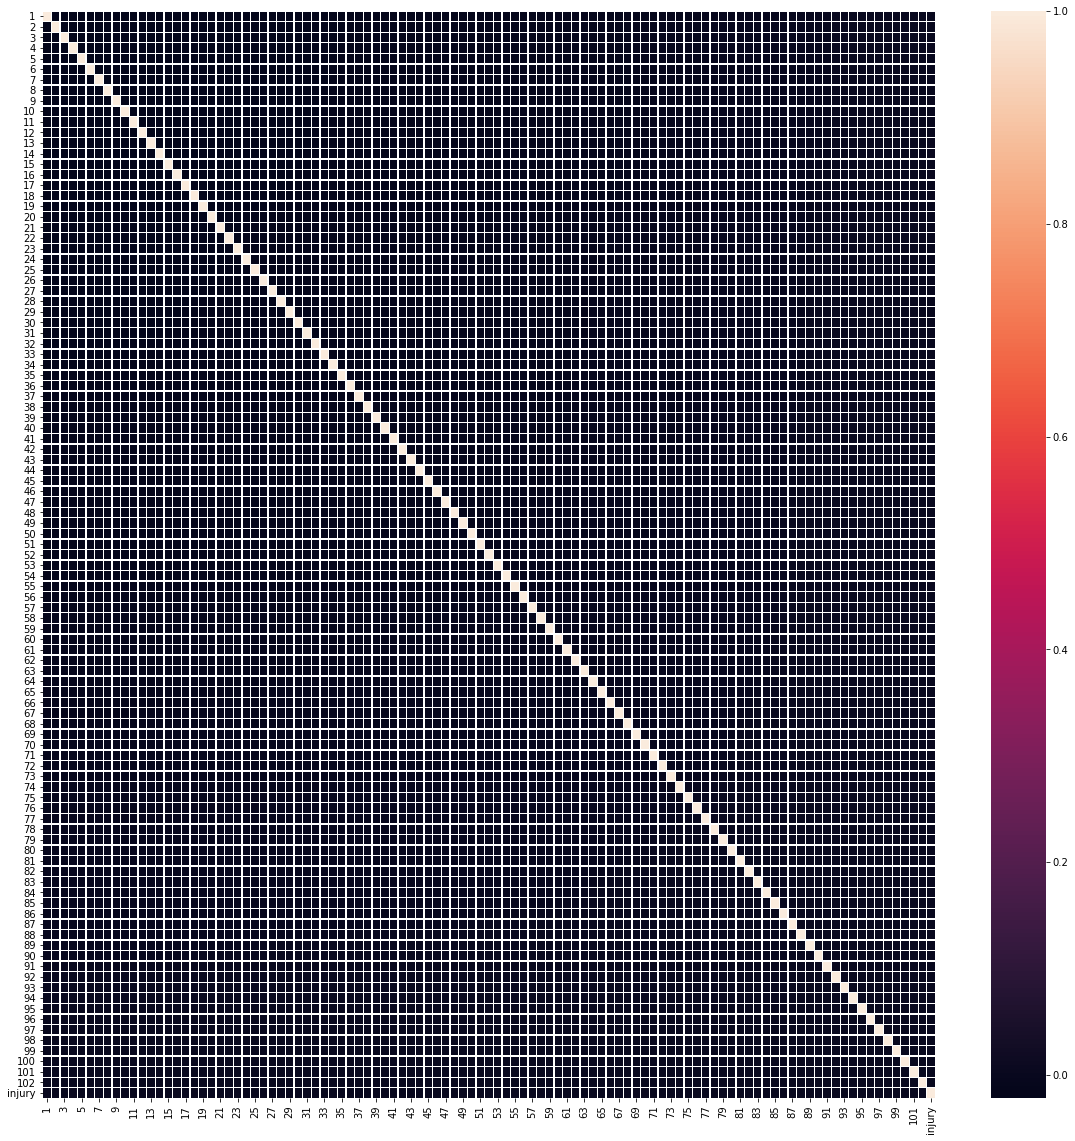

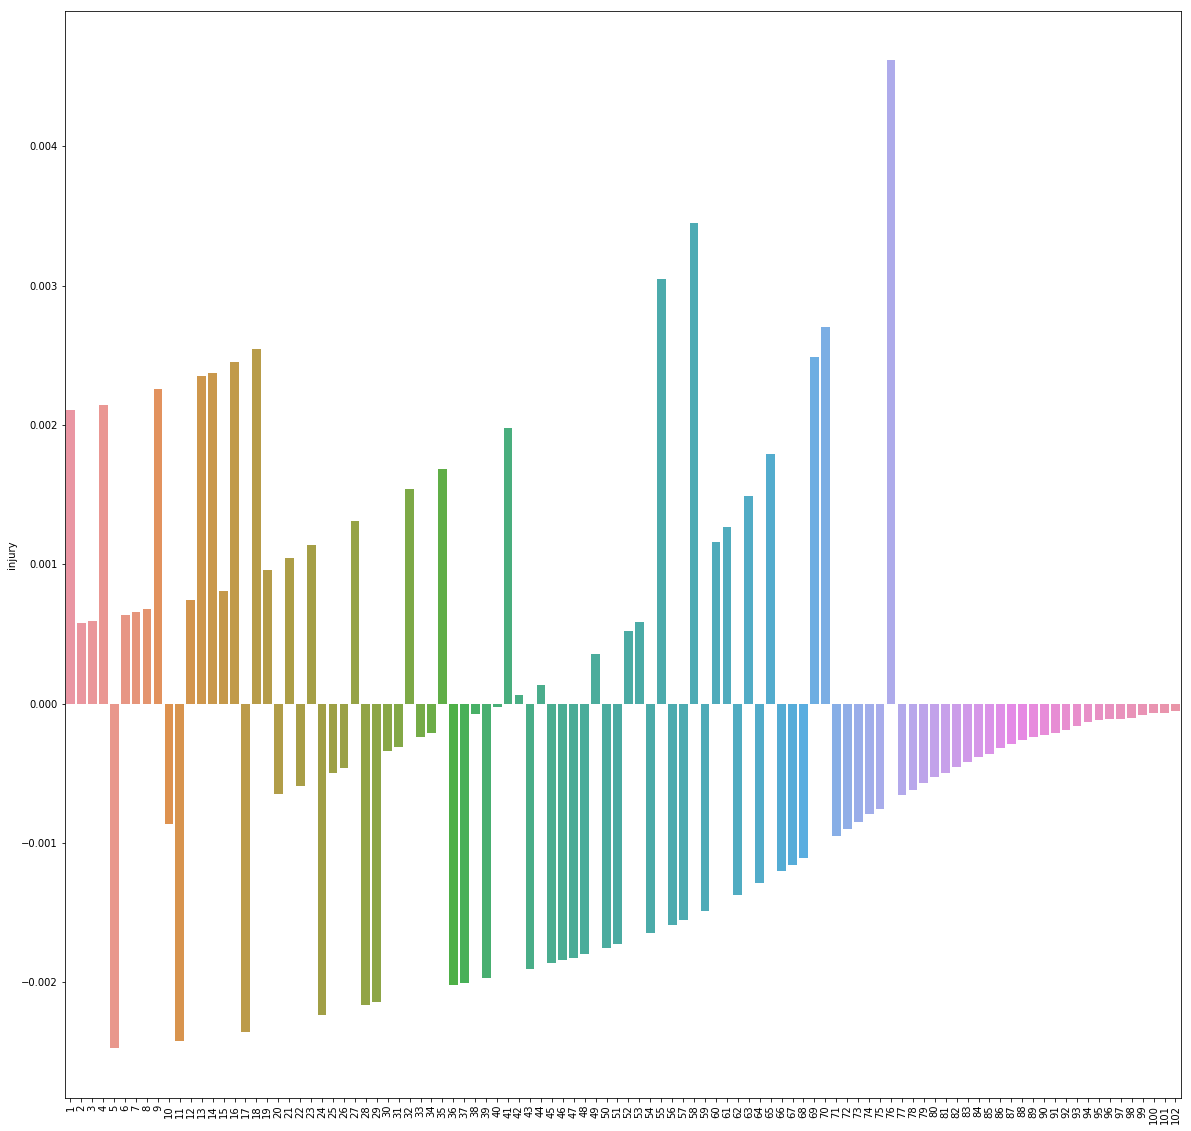

In [26]:
get_heatmap('PlayerGamePlay')